In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from numpy import math

<ipython-input-2-af9ca3707dad>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
import math as mth
import seaborn as sns
import matplotlib.pyplot as mpl

In [ ]:
from datetime import datetime
import datetime as dt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
data = pd.read_csv("/content/Online Retail.csv")

df = pd.DataFrame(data)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
len(df)

51165

In [ ]:
df.shape

(51165, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51165 entries, 0 to 51164
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    51165 non-null  object 
 1   StockCode    51165 non-null  object 
 2   Description  51020 non-null  object 
 3   Quantity     51165 non-null  int64  
 4   InvoiceDate  51164 non-null  object 
 5   UnitPrice    51164 non-null  float64
 6   CustomerID   32760 non-null  float64
 7   Country      51164 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,51165.000000,51164.000000,32760.000000
mean,8.193433,6.357762,15411.000549
std,56.291553,164.619461,1759.759629
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14032.000000
50%,2.000000,2.510000,15456.000000
75%,8.000000,4.250000,17019.000000
max,2880.000000,16888.020000,18283.000000


In [ ]:
df.duplicated().sum()

539

In [ ]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      145
Quantity           0
InvoiceDate        1
UnitPrice          1
CustomerID     18405
Country            1
dtype: int64

In [ ]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      145
Quantity           0
InvoiceDate        1
UnitPrice          1
CustomerID     18405
Country            1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(32225, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32225 entries, 0 to 51163
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    32225 non-null  object 
 1   StockCode    32225 non-null  object 
 2   Description  32225 non-null  object 
 3   Quantity     32225 non-null  int64  
 4   InvoiceDate  32225 non-null  object 
 5   UnitPrice    32225 non-null  float64
 6   CustomerID   32225 non-null  float64
 7   Country      32225 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.2+ MB


In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
50790,C540555,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,1/10/11 9:56,7.95,16279.0,United Kingdom
51024,C540634,85232B,SET OF 3 BABUSHKA STACKING TINS,-3,1/10/11 12:02,4.95,13672.0,United Kingdom
51025,C540634,21655,HANGING RIDGE GLASS T-LIGHT HOLDER,-12,1/10/11 12:02,1.69,13672.0,United Kingdom
51026,C540634,79323P,PINK CHERRY LIGHTS,-4,1/10/11 12:02,6.75,13672.0,United Kingdom


In [ ]:
df1 = df[df['InvoiceNo'].str.startswith('C')]

In [ ]:
df1.shape

(876, 8)

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,876.000000,876.000000,876.000000
mean,-20.002283,6.999475,15029.668950
std,317.175294,41.828320,1653.683737
min,-9360.000000,0.030000,12395.000000
25%,-6.000000,1.650000,13680.000000
50%,-2.000000,2.950000,15005.000000
75%,-1.000000,5.950000,16252.000000
max,-1.000000,1126.000000,18269.000000


In [ ]:
df1['UnitPrice'].value_counts()

UnitPrice
2.95     77
1.25     75
1.65     64
3.75     51
4.95     48
         ..
42.50     1
26.93     1
3.81      1
12.34     1
5.72      1
Name: count, Length: 76, dtype: int64

In [ ]:
df1[df1['UnitPrice']==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df1=df1[df1['UnitPrice']>1]

In [ ]:
df1['UnitPrice'].describe()

count     780.000000
mean        7.777436
std        44.268345
min         1.060000
25%         1.950000
50%         3.750000
75%         6.950000
max      1126.000000
Name: UnitPrice, dtype: float64

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom


In [ ]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
50790,C540555,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,1/10/11 9:56,7.95,16279.0,United Kingdom
51024,C540634,85232B,SET OF 3 BABUSHKA STACKING TINS,-3,1/10/11 12:02,4.95,13672.0,United Kingdom
51025,C540634,21655,HANGING RIDGE GLASS T-LIGHT HOLDER,-12,1/10/11 12:02,1.69,13672.0,United Kingdom
51026,C540634,79323P,PINK CHERRY LIGHTS,-4,1/10/11 12:02,6.75,13672.0,United Kingdom
51157,C540643,22423,REGENCY CAKESTAND 3 TIER,-2,1/10/11 14:08,10.95,12471.0,Germany


In [ ]:
df1.shape

(780, 8)

In [ ]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%m/%d/%y %H:%M')

In [ ]:
df1['InvoiceDate']

141     2010-12-01 09:41:00
154     2010-12-01 09:49:00
235     2010-12-01 10:24:00
239     2010-12-01 10:24:00
240     2010-12-01 10:24:00
                ...        
50790   2011-01-10 09:56:00
51024   2011-01-10 12:02:00
51025   2011-01-10 12:02:00
51026   2011-01-10 12:02:00
51157   2011-01-10 14:08:00
Name: InvoiceDate, Length: 780, dtype: datetime64[ns]

In [ ]:
df1['day'] = df1['InvoiceDate'].dt.day_name()
df1['year'] = df1['InvoiceDate'].apply(lambda x:x.year)

In [ ]:
df1['month_num'] = df1['InvoiceDate'].apply(lambda x:x.month)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,2010,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,2010,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,Wednesday,2010,12
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12


In [ ]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num
50790,C540555,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,2011-01-10 09:56:00,7.95,16279.0,United Kingdom,Monday,2011,1
51024,C540634,85232B,SET OF 3 BABUSHKA STACKING TINS,-3,2011-01-10 12:02:00,4.95,13672.0,United Kingdom,Monday,2011,1
51025,C540634,21655,HANGING RIDGE GLASS T-LIGHT HOLDER,-12,2011-01-10 12:02:00,1.69,13672.0,United Kingdom,Monday,2011,1
51026,C540634,79323P,PINK CHERRY LIGHTS,-4,2011-01-10 12:02:00,6.75,13672.0,United Kingdom,Monday,2011,1
51157,C540643,22423,REGENCY CAKESTAND 3 TIER,-2,2011-01-10 14:08:00,10.95,12471.0,Germany,Monday,2011,1


In [ ]:
df1['day_num'] = df1['InvoiceDate'].dt.day

In [ ]:
df1['hour'] = df1['InvoiceDate'].dt.hour

In [ ]:
df1['minute'] = df1['InvoiceDate'].dt.minute


In [ ]:
df1['month'] = df1['InvoiceDate'].apply(lambda x:x.month_name())

In [ ]:
df1['total_amount'] = df1['Quantity']*df1['UnitPrice']

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,total_amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,2010,12,1,9,41,December,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,2010,12,1,9,49,December,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80


In [ ]:
desc_df = df1['Description'].value_counts().reset_index()
desc_df.head()

,Description,count
0,REGENCY CAKESTAND 3 TIER,18
1,RED RETROSPOT CAKE STAND,12
2,RED RETROSPOT TRADITIONAL TEAPOT,10
3,Discount,9
4,LARGE POPCORN HOLDER,9


In [ ]:
desc_df.rename({'index':'Description name'},inplace=True)

In [ ]:
desc_df.rename({'Description':'count'},inplace=True)

In [ ]:
desc_df.head()

,Description,count
0,REGENCY CAKESTAND 3 TIER,18
1,RED RETROSPOT CAKE STAND,12
2,RED RETROSPOT TRADITIONAL TEAPOT,10
3,Discount,9
4,LARGE POPCORN HOLDER,9


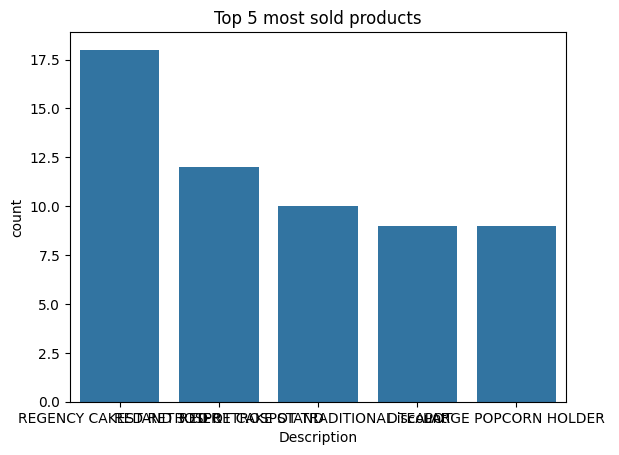

In [ ]:
sns.barplot(x='Description', y='count', data=desc_df[:5])
mpl.title('Top 5 most sold products')
mpl.show()

In [ ]:
desc_df.tail()

,Description,count
424,ASSORTED TUTTI FRUTTI LARGE PURSE,1
425,WOODEN BOX OF DOMINOES,1
426,FOOD CONTAINER SET 3 LOVE HEART,1
427,5 HOOK HANGER RED MAGIC TOADSTOOL,1
428,PINK CHERRY LIGHTS,1


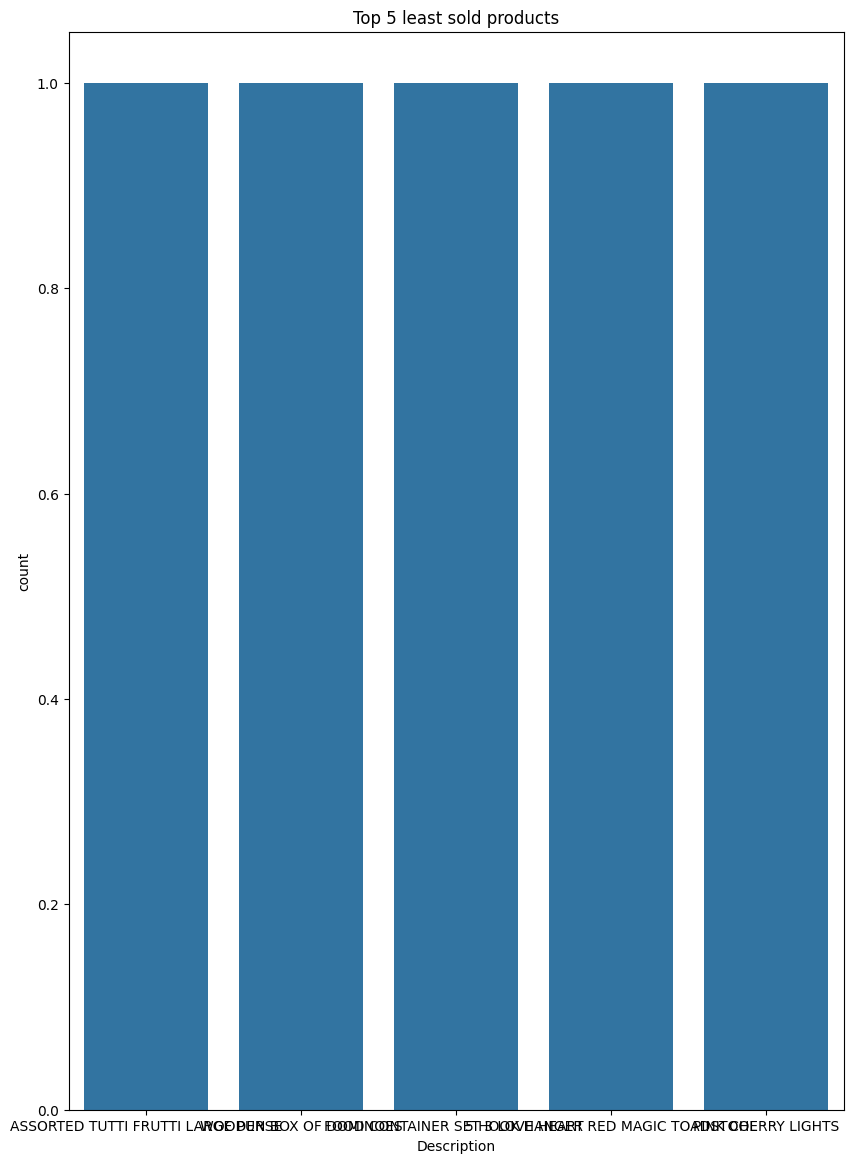

In [ ]:
mpl.figure(figsize=(10,14))
sns.barplot(x='Description', y='count', data=desc_df[-5:])
mpl.title('Top 5 least sold products')
mpl.show()


In [ ]:
df1['Country'].value_counts()

Country
United Kingdom    646
Germany            63
EIRE               37
France              8
Portugal            8
Belgium             4
Japan               4
Australia           3
Italy               2
Sweden              2
Israel              2
Spain               1
Name: count, dtype: int64

In [ ]:
country_df = df1['Country'].value_counts().reset_index()
country_df

,Country,count
0,United Kingdom,646
1,Germany,63
2,EIRE,37
3,France,8
4,Portugal,8
5,Belgium,4
6,Japan,4
7,Australia,3
8,Italy,2
9,Sweden,2


In [ ]:
country_df.rename({'index':'Country_name'},inplace=True)
country_df.rename({'Country':'count'},inplace=True)

In [ ]:
country_df.head()

,Country,count
0,United Kingdom,646
1,Germany,63
2,EIRE,37
3,France,8
4,Portugal,8


In [ ]:
country_df.tail()

,Country,count
7,Australia,3
8,Italy,2
9,Sweden,2
10,Israel,2
11,Spain,1


In [ ]:
len(df1['CustomerID'].unique())

275

In [ ]:
share_df = (df1['CustomerID'].value_counts()/sum(df1['CustomerID'].value_counts())*100).reset_index()
share_df.head()

,CustomerID,count
0,14911.0,4.487179
1,15514.0,3.589744
2,13798.0,3.333333
3,12471.0,2.692308
4,17511.0,2.692308


In [ ]:
share_df.columns = ['Customer_ID','order share']
share_df.head()


,Customer_ID,order share
0,14911.0,4.487179
1,15514.0,3.589744
2,13798.0,3.333333
3,12471.0,2.692308
4,17511.0,2.692308


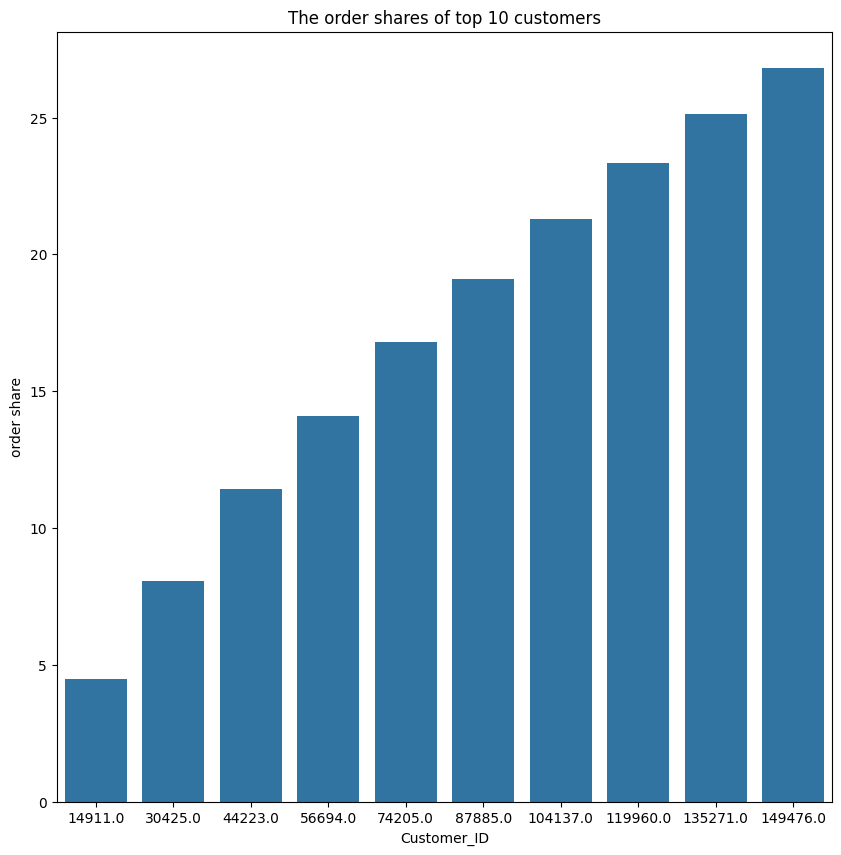

In [ ]:
mpl.figure(figsize=(10,10))
sns.barplot(x='Customer_ID', y='order share', data=share_df[:10].cumsum())
mpl.title('The order shares of top 10 customers')
mpl.show()

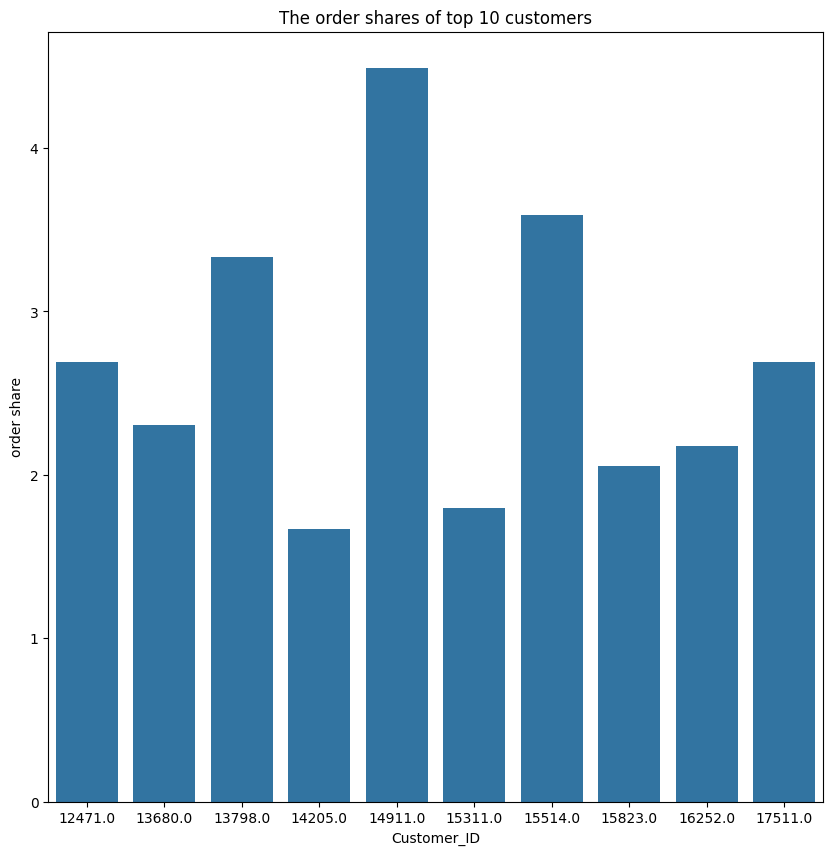

In [ ]:
mpl.figure(figsize=(10,10))
sns.barplot(x='Customer_ID', y='order share', data=share_df[:10])
mpl.title('The order shares of top 10 customers')
mpl.show()

<ipython-input-63-7b8dc8bf2af6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  mpl.subplot(2,2,count)
<ipython-input-63-7b8dc8bf2af6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[c])
<ipython-input-63-7b8dc8bf2af6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the n

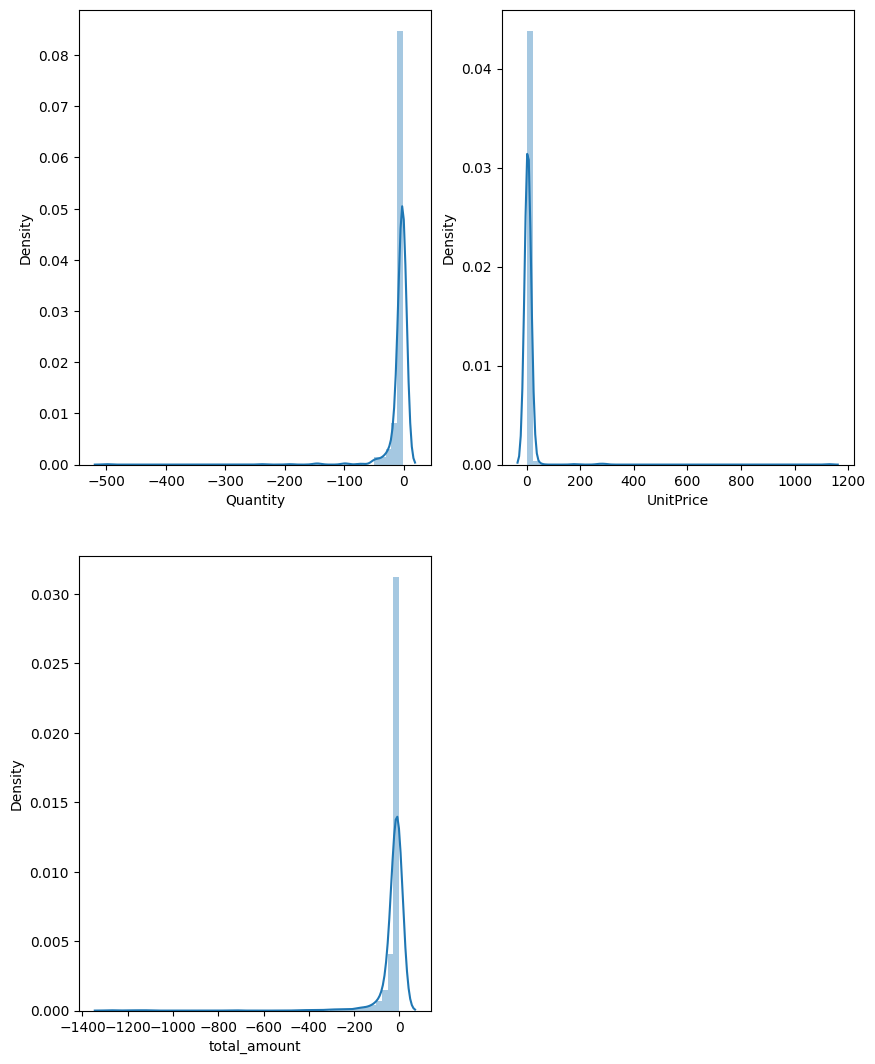

In [ ]:
columns_name = ['Quantity', 'UnitPrice', 'total_amount']
count = 1
mpl.subplots(figsize=(10,13))
for c in columns_name:
  mpl.subplot(2,2,count)
  sns.distplot(df1[c])
  count+=1

<ipython-input-64-7f1bd7c0b4f9>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  mpl.subplot(2,2,count)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-64-7f1bd7c0b4f9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

ValueError: cannot convert float NaN to integer

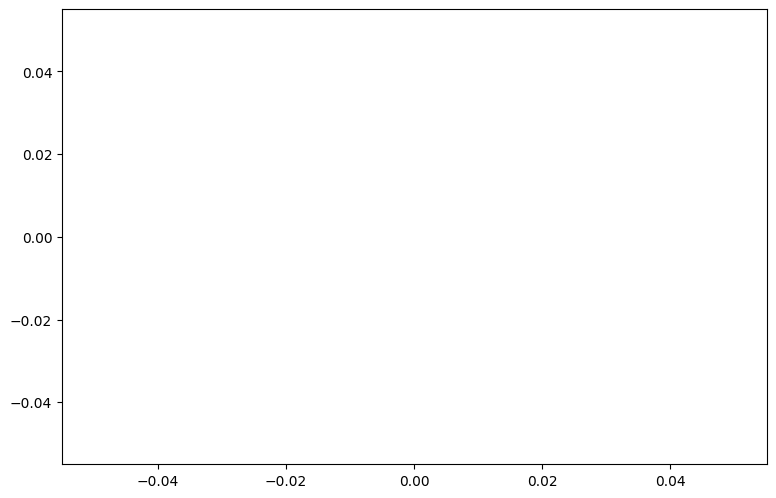

In [ ]:
columns_name = ['Quantity', 'UnitPrice', 'total_amount']
# taking a log transformation
count = 1
mpl.subplots(figsize=(20,13))
for feature in columns_name:
  mpl.subplot(2,2,count)
  sns.distplot(np.log1p(df1[feature]))
  mpl.title(f"Distribution of the variable {feature}", fontsize=16)
  mpl.xlabel(f"{feature}")
  mpl.ylabel("Density")
  count += 1

In [ ]:
day_df = df1['day'].value_counts().reset_index()

In [ ]:
day_df.head()

,day,count
0,Thursday,209
1,Wednesday,189
2,Tuesday,118
3,Monday,116
4,Friday,100


In [ ]:
day_df.columns = ['day_name','count']

In [ ]:
day_df.head()

,day_name,count
0,Thursday,209
1,Wednesday,189
2,Tuesday,118
3,Monday,116
4,Friday,100


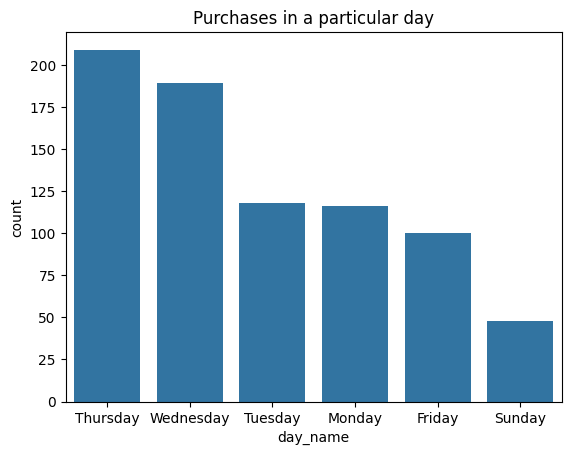

In [ ]:
sns.barplot(x='day_name', y='count', data=day_df)
mpl.title('Purchases in a particular day')
mpl.show()

In [ ]:
month_df = df1['month'].value_counts().reset_index()
month_df

,month,count
0,December,603
1,January,177


In [ ]:
month_df.columns = ['month_name','count']

In [ ]:
month_df

,month_name,count
0,December,603
1,January,177


In [ ]:
hour_df = df1['hour'].value_counts().reset_index()
hour_df

,hour,count
0,14,138
1,15,134
2,12,123
3,11,80
4,10,75
5,13,69
6,16,58
7,17,53
8,9,35
9,18,14


In [ ]:
hour_df.rename({'index':'hour_name'},inplace=True)
hour_df.rename({'hour':'count'},inplace=True)

In [ ]:
hour_df.head()

,hour,count
0,14,138
1,15,134
2,12,123
3,11,80
4,10,75


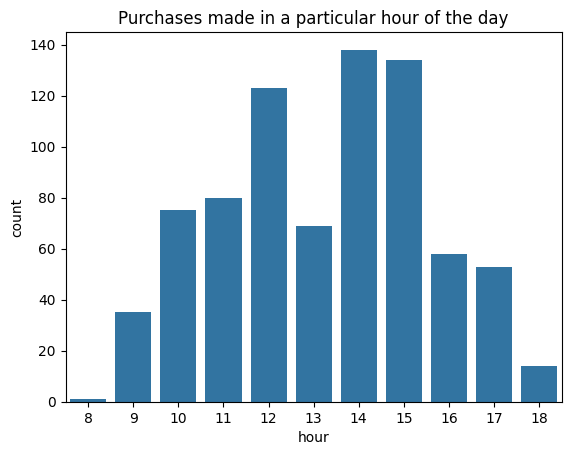

In [ ]:
sns.barplot(x='hour', y='count', data=hour_df)
mpl.title('Purchases made in a particular hour of the day')
mpl.show()

In [ ]:
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df1['time_day'] =df1['hour'].apply(time_day)

In [ ]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,total_amount,time_day
50790,C540555,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,2011-01-10 09:56:00,7.95,16279.0,United Kingdom,Monday,2011,1,10,9,56,January,-7.95,Morning
51024,C540634,85232B,SET OF 3 BABUSHKA STACKING TINS,-3,2011-01-10 12:02:00,4.95,13672.0,United Kingdom,Monday,2011,1,10,12,2,January,-14.85,Afternoon
51025,C540634,21655,HANGING RIDGE GLASS T-LIGHT HOLDER,-12,2011-01-10 12:02:00,1.69,13672.0,United Kingdom,Monday,2011,1,10,12,2,January,-20.28,Afternoon
51026,C540634,79323P,PINK CHERRY LIGHTS,-4,2011-01-10 12:02:00,6.75,13672.0,United Kingdom,Monday,2011,1,10,12,2,January,-27.00,Afternoon
51157,C540643,22423,REGENCY CAKESTAND 3 TIER,-2,2011-01-10 14:08:00,10.95,12471.0,Germany,Monday,2011,1,10,14,8,January,-21.90,Afternoon


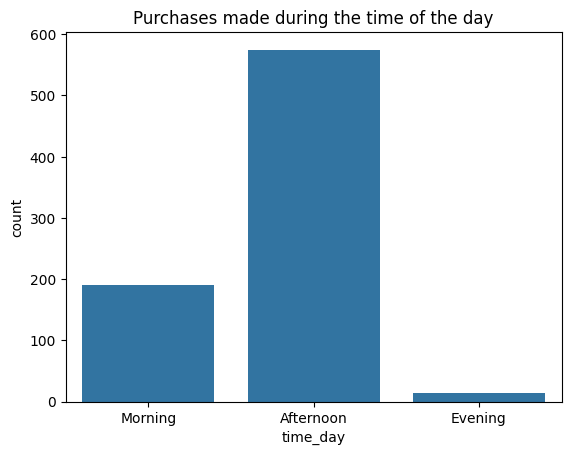

In [ ]:
sns.countplot(x='time_day', data=df1)
mpl.title('Purchases made during the time of the day')
mpl.show()

**RFM Model (Recency, Frequency and Monetary):**

In [ ]:
c_df = df1[df1['Country']=='United Kingdom']
c_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,total_amount,time_day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,2010,12,1,9,41,December,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,2010,12,1,9,49,December,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80,Morning
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-41.40,Morning
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80,Morning


In [ ]:
df1['InvoiceDate'].max()

Timestamp('2011-01-10 14:08:00')

In [ ]:
latest_date = dt.datetime(2010,12,13)

In [ ]:
rmf_df = df1.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,'InvoiceNo':lambda x:len(x),'total_amount':lambda x:x.sum()})

In [ ]:
rmf_df.head()

,InvoiceDate,InvoiceNo,total_amount
CustomerID,,,
12395.0,-24,1,-2.95
12413.0,-25,1,-54.00
12417.0,-25,3,-31.95
12427.0,-11,3,-56.95
12434.0,-2,3,-27.75


In [ ]:
rmf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 12395.0 to 18269.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceDate   275 non-null    int64  
 1   InvoiceNo     275 non-null    int64  
 2   total_amount  275 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.6 KB


In [ ]:
rmf_df.columns = ['Recency','Frequency','Monetary']

In [ ]:
rmf_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12395.0,-24,1,-2.95
12413.0,-25,1,-54.00
12417.0,-25,3,-31.95
12427.0,-11,3,-56.95
12434.0,-2,3,-27.75


In [ ]:
rmf_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12395.0,-24,1,-2.95
1,12413.0,-25,1,-54.00
2,12417.0,-25,3,-31.95
3,12427.0,-11,3,-56.95
4,12434.0,-2,3,-27.75


In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,total_amount,time_day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,2010,12,1,9,41,December,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,2010,12,1,9,49,December,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80,Morning
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-41.40,Morning
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,2010,12,1,10,24,December,-19.80,Morning


In [ ]:
df1.groupby('day')['UnitPrice'].mean()

day
Friday        5.961000
Monday        5.322241
Sunday        5.562083
Thursday     10.945646
Tuesday       8.228729
Wednesday     7.022804
Name: UnitPrice, dtype: float64

In [ ]:
df1.groupby('day')['total_amount'].mean()

day
Friday      -60.441900
Monday      -25.011466
Sunday      -11.700625
Thursday    -26.070478
Tuesday     -35.483814
Wednesday   -16.512275
Name: total_amount, dtype: float64

In [ ]:
rmf_df.describe()

,Recency,Frequency,Monetary
count,275.000000,275.000000,275.000000
mean,-4.934545,2.836364,-80.959236
std,11.006438,4.119402,204.956985
min,-29.000000,1.000000,-1472.910000
25%,-9.000000,1.000000,-53.450000
50%,-2.000000,2.000000,-23.850000
75%,3.000000,3.000000,-11.045000
max,11.000000,35.000000,-1.250000


<ipython-input-94-a8d4780c28d4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  mpl.subplot(2,2,count)
<ipython-input-94-a8d4780c28d4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rmf_df[f])
<ipython-input-94-a8d4780c28d4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

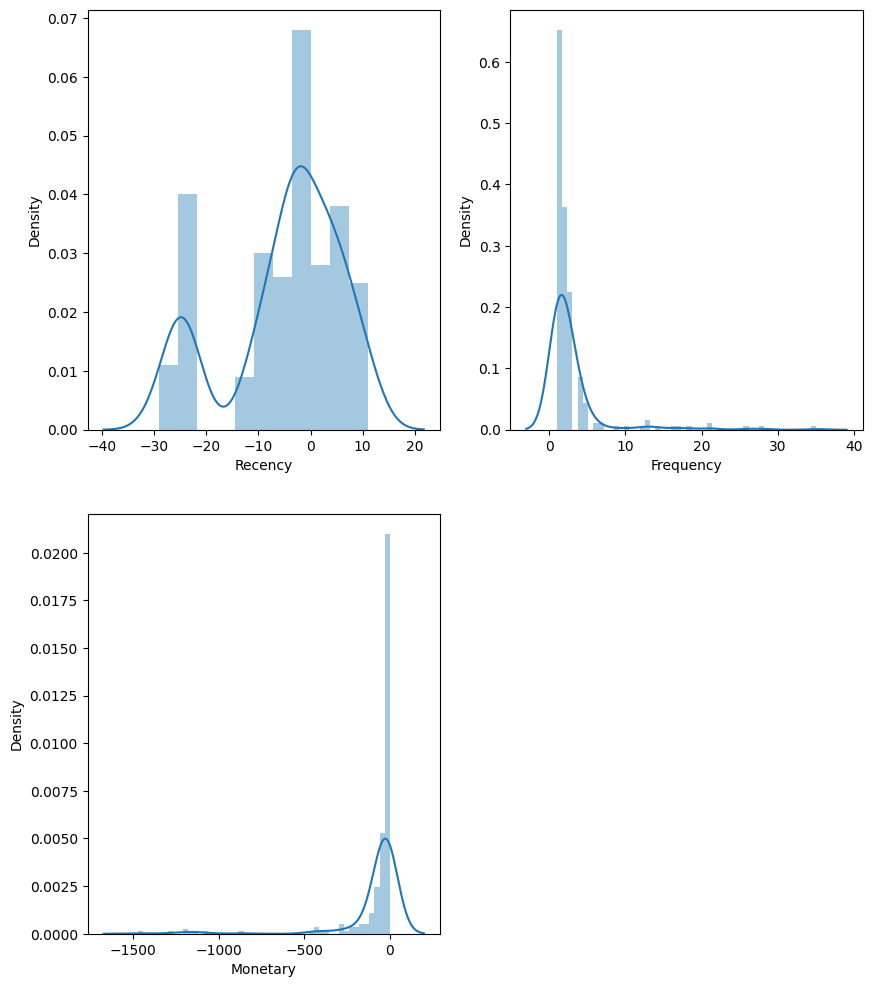

In [ ]:
mpl.subplots(figsize=(10,12))
count=1
for f in rmf_df:
  mpl.subplot(2,2,count)
  sns.distplot(rmf_df[f])
  count+=1

In [ ]:
def handle_negative(num):
  if num<=0:
    return 1
  else:
    return num

rmf_df['Recency'] = [handle_negative(x) for x in rmf_df['Recency']]
rmf_df['Monetary'] = [handle_negative(x) for x in rmf_df['Monetary']]





In [ ]:
log_df = rmf_df[['Monetary','Recency','Frequency']].apply(np.log,axis=1).round(2)

In [ ]:
log_df.head()

,Monetary,Recency,Frequency
CustomerID,,,
12395.0,0.0,0.0,0.0
12413.0,0.0,0.0,0.0
12417.0,0.0,0.0,1.1
12427.0,0.0,0.0,1.1
12434.0,0.0,0.0,1.1


<ipython-input-100-fa0d95094de0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  mpl.subplot(2,2,count)
<ipython-input-100-fa0d95094de0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_df[i])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-100-fa0d95094de0>:5: UserWarning: 

`distplot` is a deprecated

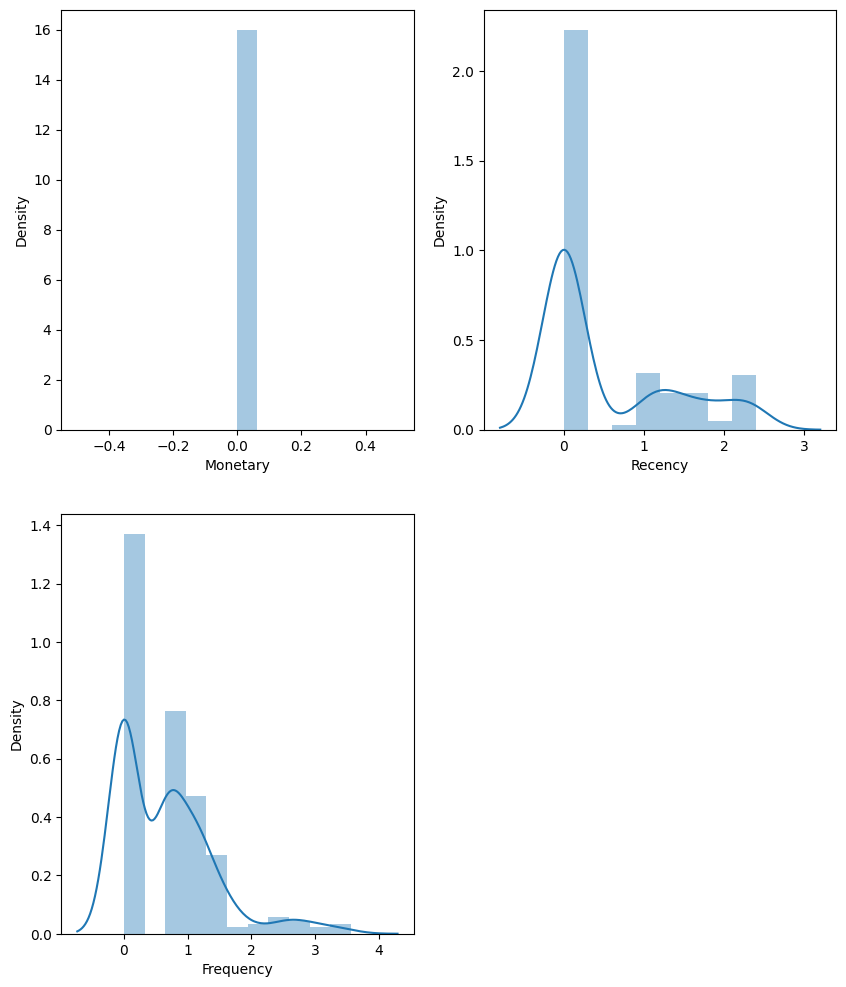

In [ ]:
count = 1
mpl.subplots(figsize=(10,12))
for i in log_df:
  mpl.subplot(2,2,count)
  sns.distplot(log_df[i])
  count+=1

In [ ]:
rmf_df['Frequency_log'] = rmf_df['Frequency'].apply(math.log)
rmf_df['Recency_log'] = rmf_df['Recency'].apply(math.log)
rmf_df['Monetary_log'] = rmf_df['Monetary'].apply(math.log)

In [ ]:
rmf_df.head()

,Recency,Frequency,Monetary,Frequency_log,Recency_log,Monetary_log
CustomerID,,,,,,
12395.0,1,1,1,0.000000,0.0,0.0
12413.0,1,1,1,0.000000,0.0,0.0
12417.0,1,3,1,1.098612,0.0,0.0
12427.0,1,3,1,1.098612,0.0,0.0
12434.0,1,3,1,1.098612,0.0,0.0


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

x = rmf_df[features].values
ss = StandardScaler()
x = ss.fit_transform(x)

In [ ]:
# now we implement k-means clustering

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
k_values = {}
for k in range(1,15):
  km = KMeans(n_clusters=k,max_iter=1000)
  km = km.fit(x)
  k_values[k] = km.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

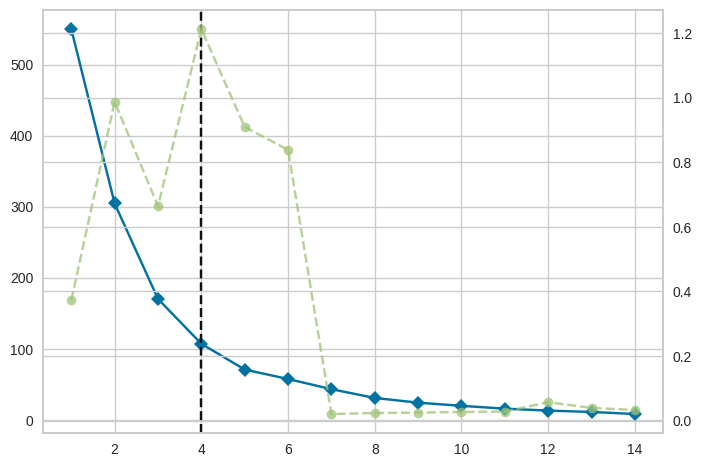

In [ ]:
viz = KElbowVisualizer(km,k=(1,15))
viz = viz.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


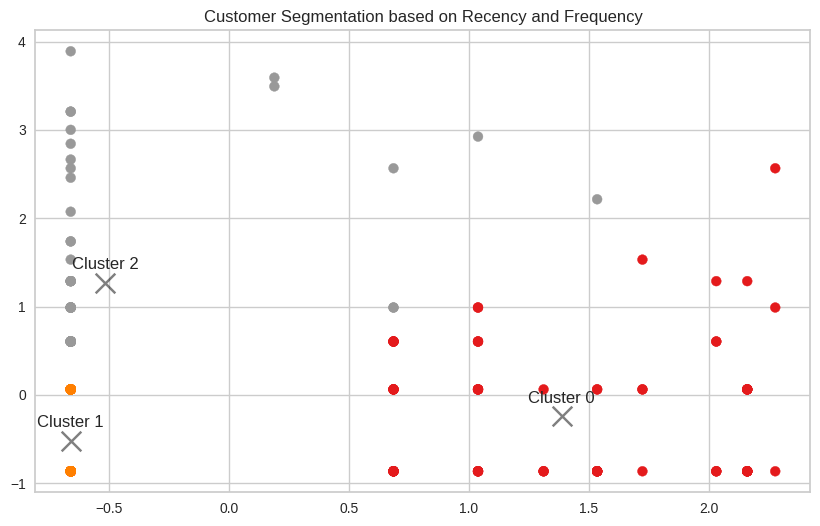

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_km = kmeans.predict(x)

# Plot the clusters
mpl.figure(figsize=(10, 6))
mpl.title('Customer Segmentation based on Recency and Frequency')
mpl.scatter(x[:,0], x[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

centers = kmeans.cluster_centers_
mpl.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x');

for i,j in enumerate(centers):
   mpl.annotate(f'Cluster {i}', (j[0], j[1]), textcoords="offset points", xytext=(0,10), ha='center')

mpl.show()

In [ ]:
quantiles = rmf_df.quantile([0.25,0.5,0.75])
print(quantiles)

      Recency  Frequency  Monetary  Frequency_log  Recency_log  Monetary_log
0.25      1.0        1.0       1.0       0.000000     0.000000           0.0
0.50      1.0        2.0       1.0       0.693147     0.000000           0.0
0.75      3.0        3.0       1.0       1.098612     1.098612           0.0


In [ ]:
quantiles = quantiles.to_dict()


AttributeError: 'dict' object has no attribute 'to_dict'

In [ ]:
quantiles

{'Recency': {0.25: 1.0, 0.5: 1.0, 0.75: 3.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Frequency_log': {0.25: 0.0,
  0.5: 0.6931471805599453,
  0.75: 1.0986122886681098},
 'Recency_log': {0.25: 0.0, 0.5: 0.0, 0.75: 1.0986122886681098},
 'Monetary_log': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [ ]:
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
rmf_df['R'] = rmf_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rmf_df['F'] = rmf_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rmf_df['M'] = rmf_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rmf_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Frequency_log,Recency_log,Monetary_log,R,F,M
0,12395.0,1,1,1,0.000000,0.0,0.0,1,4,4
1,12413.0,1,1,1,0.000000,0.0,0.0,1,4,4
2,12417.0,1,3,1,1.098612,0.0,0.0,1,2,4
3,12427.0,1,3,1,1.098612,0.0,0.0,1,2,4
4,12434.0,1,3,1,1.098612,0.0,0.0,1,2,4


In [ ]:
rmf_df['RFMGroup'] = rmf_df['R'].map(str) + rmf_df['F'].map(str) + rmf_df['M'].map(str)

# calculate RFM score from RFM group column
rmf_df['RFMScore'] = rmf_df[['R', 'F', 'M']].sum(axis=1)
rmf_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Frequency_log,Recency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12395.0,1,1,1,0.000000,0.0,0.0,1,4,4,144,9
1,12413.0,1,1,1,0.000000,0.0,0.0,1,4,4,144,9
2,12417.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7
3,12427.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7
4,12434.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7


In [ ]:
rmf_df['Clusters'] = km.labels_

In [ ]:
rmf_df.head()

,Recency,Frequency,Monetary,Frequency_log,Recency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Clusters
CustomerID,,,,,,,,,,,,
12395.0,1,1,1,0.000000,0.0,0.0,1,4,4,144,9,3
12413.0,1,1,1,0.000000,0.0,0.0,1,4,4,144,9,3
12417.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7,8
12427.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7,8
12434.0,1,3,1,1.098612,0.0,0.0,1,2,4,124,7,8


In [ ]:
rmf_df.groupby('Clusters').mean()

,Recency,Frequency,Monetary,Frequency_log,Recency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
Clusters,,,,,,,,,,,
0,1.000000,2.000000,1.0,0.693147,0.000000,0.0,1.000000,3.000000,4.0,2915959437698568299692632206785422013145627451...,8.000000
1,3.583333,2.000000,1.0,0.693147,1.261049,0.0,3.500000,3.000000,4.0,27869536202869529576791526445416448.0,10.500000
2,1.000000,15.500000,1.0,2.704768,0.000000,0.0,1.000000,1.000000,4.0,14264264264264263401472.0,6.000000
3,1.000000,1.000000,1.0,0.000000,0.000000,0.0,1.000000,4.000000,4.0,1848001848001847887703609388352023466562283086...,9.000000
4,9.846154,1.000000,1.0,0.000000,2.285603,0.0,4.000000,4.000000,4.0,34188034188034189080845168097225605120.0,12.000000
5,1.000000,4.700000,1.0,1.529472,0.000000,0.0,1.000000,1.000000,4.0,5705705705705705632062165209370158226469731146...,6.000000
6,3.352941,1.000000,1.0,0.000000,1.200147,0.0,3.352941,4.000000,4.0,2613790260849084497452882252506742562174428354...,11.352941
7,6.000000,13.250000,1.0,2.566424,1.668640,0.0,3.750000,1.000000,4.0,103578603603.5,8.750000
8,1.000000,3.000000,1.0,1.098612,0.000000,0.0,1.000000,2.000000,4.0,4004004004004003862109241677617689286240474121...,7.000000
